In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [92]:
path = r"..\..\data\Global_Economy_Indicators.csv"

df = pd. read_csv(path)

df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


### 1. basic insights

Top 5 countries by average GDP

In [93]:
GDP = df.groupby(' Country ')[' Gross Domestic Product (GDP) '].mean().sort_values(ascending=False).head(5)
GDP

 Country 
United States      9.321346e+12
Japan              3.417731e+12
China              3.372873e+12
Germany            2.095904e+12
United Kingdom     1.515096e+12
Name:  Gross Domestic Product (GDP) , dtype: float64

Countries with the Household consumption expenditure in the most recent year

In [94]:
latest = df[df[' Year '] == df[' Year '].max()]
top5 = latest.sort_values(by=' Household consumption expenditure (including Non-profit institutions serving households) ', ascending=False).head(5)
print(top5[[ ' Country ',' Household consumption expenditure (including Non-profit institutions serving households) ']])

              Country   \
10144   United States    
1999            China    
4680            Japan    
3484          Germany    
4212            India    

       Household consumption expenditure (including Non-profit institutions serving households)   
10144                                       1.590000e+13                                          
1999                                        6.800000e+12                                          
4680                                        2.660000e+12                                          
3484                                        2.100000e+12                                          
4212                                        1.910000e+12                                          


### 2. Group by 

Mean GDP per capita

In [95]:
mean_GDP = df.groupby(' Country ')[[" Gross Domestic Product (GDP) ", " Per capita GNI "]].mean()
print(mean_GDP)


                            Gross Domestic Product (GDP)   Per capita GNI 
 Country                                                                  
Afghanistan                                  7.094304e+09       313.403846
Albania                                      5.996965e+09      2052.807692
Algeria                                      8.267588e+10      2530.923077
Andorra                                      1.719792e+09     26166.826923
Angola                                       3.650808e+10      1527.615385
...                                                   ...              ...
Yemen Democratic (Former)                    3.406513e+08       155.809524
Yugoslavia (Former)                          5.617382e+10      2561.857143
Zambia                                       8.983579e+09       696.692308
Zanzibar                                     7.234414e+08       552.125000
Zimbabwe                                     1.104799e+10       965.576923

[220 rows x 2 columns]


Max import of goods values

In [96]:
max_imports = df.groupby( ' Country ')[' Imports of goods and services '].max().sort_values(ascending=False)
max_imports


 Country 
United States               3.400000e+12
China                       3.060000e+12
Germany                     1.780000e+12
Japan                       1.010000e+12
United Kingdom              9.430000e+11
                                ...     
Nauru                       1.378354e+08
Montserrat                  6.614815e+07
Tuvalu                      6.190085e+07
Czechoslovakia (Former)              NaN
USSR (Former)                        NaN
Name:  Imports of goods and services , Length: 220, dtype: float64

Total exports over all years

In [97]:
Total_exports_ovar_all_years = df.groupby([' Country ',' Year '])[' Exports of goods and services '].mean()

Total_exports_ovar_all_years

 Country       Year 
Afghanistan   1970      1.656187e+08
              1971      1.935803e+08
              1972      2.276544e+08
              1973      2.269136e+08
              1974      2.849384e+08
                            ...     
Zimbabwe      2017      5.434790e+09
              2018      6.186541e+09
              2019      6.137453e+09
              2020      5.614855e+09
              2021      6.128771e+09
Name:  Exports of goods and services , Length: 10512, dtype: float64

### Plot 

Top 5 Countries by Average GDP

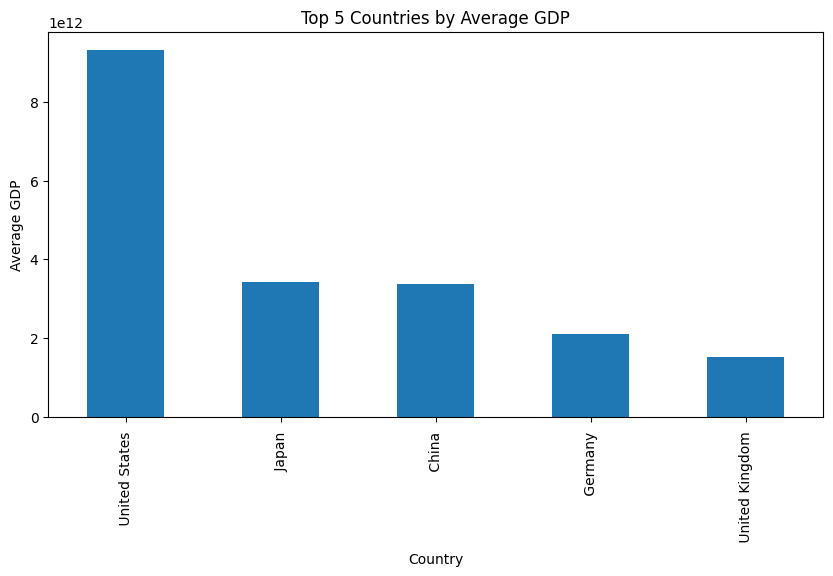

In [98]:
plt.figure(figsize=(10, 5))
GDP.plot(kind='bar')
plt.title("Top 5 Countries by Average GDP")
plt.ylabel("Average GDP")
plt.xlabel("Country")

plt.show()

Countries with the Household consumption expenditure in the most recent year

<Figure size 1000x500 with 0 Axes>

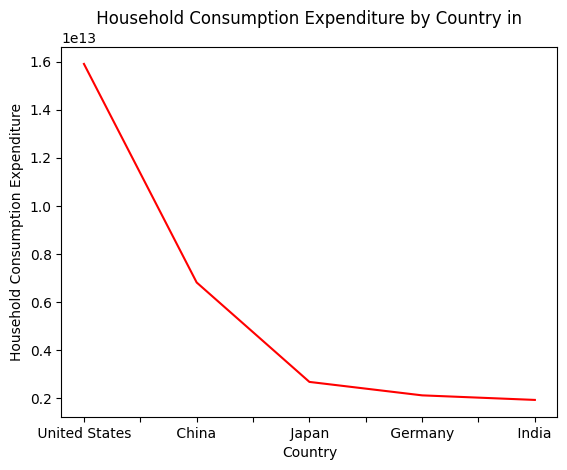

In [99]:
plt.figure(figsize=(10, 5))
top5.plot(kind='line', x=' Country ', y=' Household consumption expenditure (including Non-profit institutions serving households) ', color='red')
plt.title(' Household Consumption Expenditure by Country in ')
plt.xlabel('Country')
plt.ylabel('Household Consumption Expenditure')
plt.legend().remove()

plt.show()

Mean GDP per capita

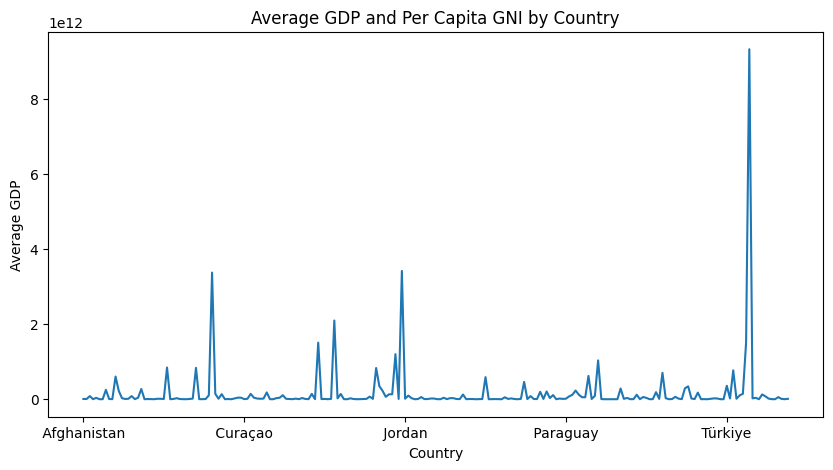

In [100]:
plt.figure(figsize=(10, 5))
mean_GDP[' Gross Domestic Product (GDP) '].plot(kind= 'line')
plt.title('Average GDP and Per Capita GNI by Country')
plt.xlabel('Country')
plt.ylabel('Average GDP')

plt.show()

Max import of goods values

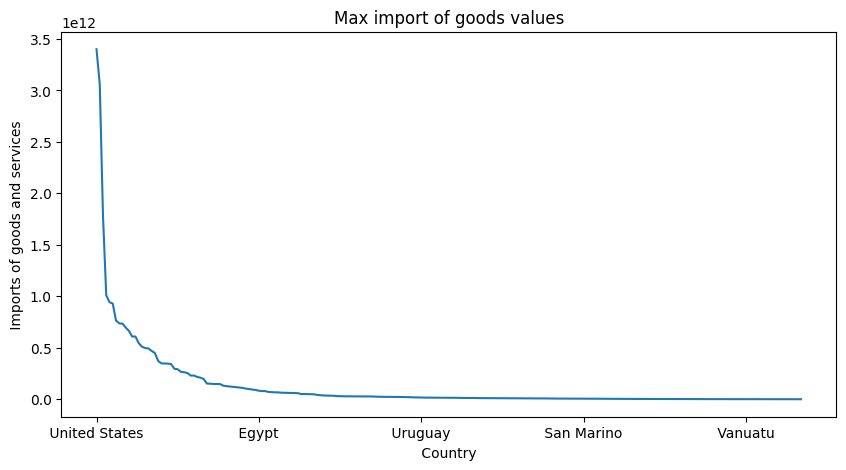

In [101]:
plt.figure(figsize=(10, 5))
max_imports.plot(kind= 'line')
plt.title('Max import of goods values')
plt.xlabel(' Country ')
plt.ylabel(' Imports of goods and services ')

plt.show()

Total exports over all year

<Figure size 1000x500 with 0 Axes>

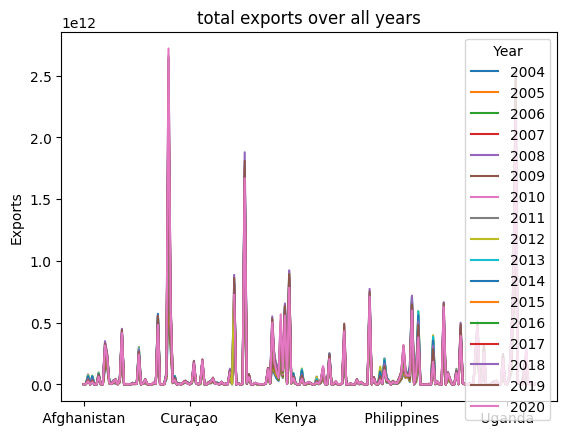

In [102]:
filtered = Total_exports_ovar_all_years.reset_index()

filtered = filtered[(filtered[' Year '] >= 2004) & (filtered[' Year '] <= 2020)]

filtered = filtered.set_index([' Country ', ' Year '])[' Exports of goods and services ']

plt.figure(figsize=(10,5))
filtered.unstack().plot()
plt.title('total exports over all years')
plt.xlabel('')
plt.ylabel('Exports')

plt.show()